# A demonstration of the autonomous decision making system

### The intent of this notebook is to demonstrate the use of a decision making system for the Nova Rover. In order to do this we need to: 
1. Simulate the rover's motion and detections in a simulated environment.
2. Simulate detected obstacles and targets
3. Demonstrate decision making system that avoids 

In [1]:
import numpy as np
class rover:
    def __init__(self):
        # Initial conditions selected arbitrarily
        self.x = 0
        self.y = 0 
        self.theta = 0
        self.world = np.zeros((100,100))
    def moveToPosition(self,new_x,new_y):
        self.x = new_x
        self.y = new_y
    

Now that the class of the rover has been defined, we will implement an a* based pathfinding algorithm to search over the known grid. 
We begin by defining a grid that exists as the rovers main knowledge base. Called World ($W$)
Where, $W$ is a 2D array used to denote the "threat" or "opportunity" level of the grid square. All grid sqaures correspond to real world positions, each grid square has width $w$, which can be tuned for the application. 

Each cell has a value $W_{x,y} \in \mathbb{R}$ 

Lower values are an opportunity, Higher values are a threat. 
The algorithm for searching the space works as follows.
1. **Initialise** If the rover has just begun a new search for a target (could be a tennis ball) then initialise the array with the following. If this is not true skip this step. 
    1. Generate an array of zeros with height and width defined by the distance between the target and the rover as estimated by the rovers localization algorithm and the competition supplied gps coordinates. Ensure sufficient for overshoot. For example if it is $X$ m to the tennis ball and square width is defined as $w$ then $n = \frac{X}{w}$ is the height and width of the array. 
    2. Place a guassian function at the tennis ball gps location with amplitude $A = -1$ and each cell within range $3 \sigma$ from the centre calculate its value from that guassian. 
    


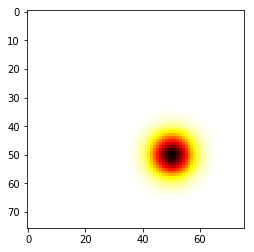

In [77]:
## Initialisation routine example in python. 
import math
import matplotlib.pyplot as plt

def normpdf(x, mean, sd):
    var = float(sd)**2
    denom = (2*math.pi*var)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var))
    return num/denom

def Initialise_tennis_ball_search():
    suspectedLocation = [50,50]
    roverLocation = [0,0]
    width = 1 # width of a grid cell = 0.1m (tuneable)
    sigma = 5 # standard deviation of the guassian
    fudgeFactor =1.5 ## Tuneable!
    x_size = int (fudgeFactor*(suspectedLocation[0]-roverLocation[0])+ 1)
    y_size = int (fudgeFactor*(suspectedLocation[1]-roverLocation[1])+ 1)
    RoverWorld = np.zeros((x_size,y_size))
    
    for i in range(suspectedLocation[0]-3*sigma,suspectedLocation[0]+3*sigma):
        for j in range(suspectedLocation[1]-3*sigma,suspectedLocation[1]+3*sigma):
            cart_dist = math.sqrt((suspectedLocation[0] - i)**2 + (suspectedLocation[0] - j)**2) 
            RoverWorld[i,j] = -1*normpdf(cart_dist,0,sigma)               
    return RoverWorld


arr = Initialise_tennis_ball_search()
plt.imshow(arr, cmap='hot', interpolation='nearest')
plt.show()

This is what the rover will know about the world when it first starts up, it will identify the cell of highest interest (Lowest cell index value) and use a minimum cost pathfinding approach
2. **Remap** the rover will scan the environment with its sensors and re update the map using its current estimates. 
    1. Detect any obstacles and/or opportunities with a certain confidence level $p$ and with a certain confidence on the localisation $\sigma_ij$. 
    2. Update the _RoverWorld_ map with the targets and opportunities, scaling them appropriately based on cost. 
3. **Pathfind** Once the map has been updated, recompute the path forward using the new information. 
4. **Move** and iterate the process. 
